---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

# Assignment 3

In this assignment you will explore text message data and create models to predict if a message is spam or not. 

In [335]:
import pandas as pd
import numpy as np

spam_data = pd.read_csv('../readonly/spam.csv')

spam_data['target'] = np.where(spam_data['target']=='spam',1,0)
spam_data.head(10)


,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [336]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], 
                                                    spam_data['target'], 
                                                    random_state=0)

### Question 1
What percentage of the documents in `spam_data` are spam?

*This function should return a float, the percent value (i.e. $ratio * 100$).*

In [337]:
def answer_one():
    spam = (spam_data['target'].value_counts()[1]/spam_data['target'].count())*100
    return spam

In [338]:
answer_one()

13.406317300789663

### Question 2

Fit the training data `X_train` using a Count Vectorizer with default parameters.

What is the longest token in the vocabulary?

*This function should return a string.*

In [339]:
from sklearn.feature_extraction.text import CountVectorizer

def answer_two():
    vect = CountVectorizer().fit(X_train)
    tokens = vect.get_feature_names()
    tokens.sort(key=lambda x: len(x), reverse=True)
    
    return tokens[0]

In [340]:
answer_two()

'com1win150ppmx3age16subscription'

### Question 3

Fit and transform the training data `X_train` using a Count Vectorizer with default parameters.

Next, fit a fit a multinomial Naive Bayes classifier model with smoothing `alpha=0.1`. Find the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [521]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

def answer_three():
    vect = CountVectorizer().fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    X_test_vectorized = vect.transform(X_test)

    clfrNB = MultinomialNB(alpha=0.1)
    clfrNB.fit(X_train_vectorized, y_train)

    predictions = clfrNB.predict(X_test_vectorized)
    return roc_auc_score(y_test, predictions)   


In [342]:
answer_three()

0.9720812182741116

### Question 4

Fit and transform the training data `X_train` using a Tfidf Vectorizer with default parameters.

What 20 features have the smallest tf-idf and what 20 have the largest tf-idf?

Put these features in a two series where each series is sorted by tf-idf value and then alphabetically by feature name. The index of the series should be the feature name, and the data should be the tf-idf.

The series of 20 features with smallest tf-idfs should be sorted smallest tfidf first, the list of 20 features with largest tf-idfs should be sorted largest first. 

*This function should return a tuple of two series
`(smallest tf-idfs series, largest tf-idfs series)`.*

###  Question 4 Clarification (from Uwe Mayer, mentor)
Unfortunately Assignment 3 Question 4 is a poorly worded question leaving out two key points.

1. The question "What 20 features have the smallest tf-idf and what 20 have the largest tf-idf?" is not clear, after all the tf-idf value of each feature depend on the document, not just the feature. What the autograder expects is more precisely the following: For each feature compute **first the maximum tf-idf value** across all documents in X_train. What 20 features have the **smallest maximum tf-idf value** and what 20 features have the **largest maximum tf-idf value**?

2. The pair of series to be returned should not have any names, nor should their index have a name. Instructions: for a series s you can remove its name and its index's name by setting them to None as in s.name=None and s.index.name=None.

In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer

def answer_four():
    vect = TfidfVectorizer().fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    # Convert sparse matrix to Dataframe using .toarray(), get column names from .get_feature_names
    tfidf = pd.DataFrame(X_train_vectorized.toarray(), columns=vect.get_feature_names())
    # Compute max tfidf value for each column (feature), returns a Series with feature names as indices
    tfidf_max = tfidf.max()
    # Compute the 20 smallest and largest tfidf from max tfidf series
    tfidf_smallest = tfidf_max.nsmallest(20)
    tfidf_largest = tfidf_max.nlargest(20)
    tfidf_smallest.sort_values()
    tfidf_largest.sort_values()
    return tfidf_smallest, tfidf_largest

In [344]:
answer_four()

(aaniye          0.074475
 athletic        0.074475
 chef            0.074475
 companion       0.074475
 courageous      0.074475
 dependable      0.074475
 determined      0.074475
 exterminator    0.074475
 healer          0.074475
 listener        0.074475
 organizer       0.074475
 pest            0.074475
 psychiatrist    0.074475
 psychologist    0.074475
 pudunga         0.074475
 stylist         0.074475
 sympathetic     0.074475
 venaam          0.074475
 afternoons      0.091250
 approaching     0.091250
 dtype: float64, 146tf150p    1.000000
 645          1.000000
 anything     1.000000
 anytime      1.000000
 beerage      1.000000
 done         1.000000
 er           1.000000
 havent       1.000000
 home         1.000000
 lei          1.000000
 nite         1.000000
 ok           1.000000
 okie         1.000000
 thank        1.000000
 thanx        1.000000
 too          1.000000
 where        1.000000
 yup          1.000000
 tick         0.980166
 blank        0.932702
 dty

### Question 5

Fit and transform the training data `X_train` using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than **3**.

Then fit a multinomial Naive Bayes classifier model with smoothing `alpha=0.1` and compute the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [345]:
def answer_five():
    vect = TfidfVectorizer(min_df=3).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    X_test_vectorized = vect.transform(X_test)

    clfrNB = MultinomialNB(alpha=0.1)
    clfrNB.fit(X_train_vectorized, y_train)

    predictions = clfrNB.predict(X_test_vectorized)
    return roc_auc_score(y_test, predictions)   

In [346]:
answer_five()

0.9416243654822335

### Question 6

What is the average length of documents (number of characters) for not spam and spam documents?

*This function should return a tuple (average length not spam, average length spam).*

In [371]:
def answer_six():
    spam = spam_data[spam_data['target'] == 1]
    not_spam = spam_data[spam_data['target'] == 0]
    avg_s = spam['text'].str.len() #apply(lambda x: len(x)).mean()
    avg_ns = not_spam['text'].str.len() #apply(lambda x: len(x)).mean()
    return avg_ns.mean(), avg_s.mean()

In [372]:
answer_six()

(71.02362694300518, 138.8661311914324)

<br>
<br>
The following function has been provided to help you combine new features into the training data:

In [349]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

### Question 7

Fit and transform the training data X_train using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than **5**.

Using this document-term matrix and an additional feature, **the length of document (number of characters)**, fit a Support Vector Classification model with regularization `C=10000`. Then compute the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [391]:
from sklearn.svm import SVC

def answer_seven():
    X_train_chars = X_train.str.len() #apply(lambda x: len(x))
    X_test_chars = X_test.str.len() #apply(lambda x: len(x))

    vect = TfidfVectorizer(min_df=5).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    X_test_vectorized = vect.transform(X_test)

    X_train_vectorized_chars = add_feature(X_train_vectorized, X_train_chars)
    X_test_vectorized_chars = add_feature(X_test_vectorized, X_test_chars)

    clfrSVC = SVC(C=10000)
    clfrSVC.fit(X_train_vectorized_chars, y_train)

    predictions = clfrSVC.predict(X_test_vectorized_chars)
    return roc_auc_score(y_test, predictions)    

In [392]:
answer_seven()

0.9581366823421557

### Question 8

What is the average number of digits per document for not spam and spam documents?

*This function should return a tuple (average # digits not spam, average # digits spam).*

In [393]:
def answer_eight():
    spam = spam_data[spam_data['target'] == 1]
    not_spam = spam_data[spam_data['target'] == 0]    
    avg_s = spam['text'].str.count(r'\d')
    avg_ns = not_spam['text'].str.count(r'\d')
    return avg_ns.mean(), avg_s.mean()

In [394]:
answer_eight()

(0.2992746113989637, 15.759036144578314)

### Question 9

Fit and transform the training data `X_train` using a Tfidf Vectorizer ignoring terms that have a document frequency strictly lower than **5** and using **word n-grams from n=1 to n=3** (unigrams, bigrams, and trigrams).

Using this document-term matrix and the following additional features:
* the length of document (number of characters)
* **number of digits per document**

fit a Logistic Regression model with regularization `C=100`. Then compute the area under the curve (AUC) score using the transformed test data.

*This function should return the AUC score as a float.*

In [408]:
from sklearn.linear_model import LogisticRegression as LR

def answer_nine():
    X_train_chars = X_train.str.len()
    X_train_digits = X_train.str.count(r'\d')
    X_test_chars = X_test.str.len()
    X_test_digits = X_test.str.count(r'\d')

    vect = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    X_test_vectorized = vect.transform(X_test)

    X_train_vectorized_adds = add_feature(X_train_vectorized, [X_train_chars, X_train_digits])
    X_test_vectorized_adds = add_feature(X_test_vectorized, [X_test_chars, X_test_digits])

    clfrLR = LR(C=100)
    clfrLR.fit(X_train_vectorized_adds, y_train)

    predictions = clfrLR.predict(X_test_vectorized_adds)
    return roc_auc_score(y_test, predictions)

In [409]:
answer_nine()

0.9653328353394565

### Question 10

What is the average number of non-word characters (anything other than a letter, digit or underscore) per document for not spam and spam documents?

*Hint: Use `\w` and `\W` character classes*

*This function should return a tuple (average # non-word characters not spam, average # non-word characters spam).*

In [404]:
def answer_ten():
    spam = spam_data[spam_data['target'] == 1]
    not_spam = spam_data[spam_data['target'] == 0]    
    avg_s = spam['text'].str.count(r'\W')
    avg_ns = not_spam['text'].str.count(r'\W')
    return avg_ns.mean(), avg_s.mean()

In [405]:
answer_ten()

(17.29181347150259, 29.041499330655956)

### Question 11

Fit and transform the training data X_train using a Count Vectorizer ignoring terms that have a document frequency strictly lower than **5** and using **character n-grams from n=2 to n=5.**

To tell Count Vectorizer to use character n-grams pass in `analyzer='char_wb'` which creates character n-grams only from text inside word boundaries. This should make the model more robust to spelling mistakes.

Using this document-term matrix and the following additional features:
* the length of document (number of characters)
* number of digits per document
* **number of non-word characters (anything other than a letter, digit or underscore.)**

fit a Logistic Regression model with regularization C=100. Then compute the area under the curve (AUC) score using the transformed test data.

Also **find the 10 smallest and 10 largest coefficients from the model** and return them along with the AUC score in a tuple.

The list of 10 smallest coefficients should be sorted smallest first, the list of 10 largest coefficients should be sorted largest first.

The three features that were added to the document term matrix should have the following names should they appear in the list of coefficients:
['length_of_doc', 'digit_count', 'non_word_char_count']

*This function should return a tuple `(AUC score as a float, smallest coefs list, largest coefs list)`.*

###  Question 11 Clarification (from Uwe Mayer, mentor)

One more clarification on Question 11, the instructions say that the return value of the function should be "(AUC score as a float, smallest coefs list, largest coefs list)". This makes one think that the two lists should be python lists. However the autograder expects the lists to be pandas Series, so the instructions should more correctly say: This function should return a tuple (AUC score as a float, smallest coefs series, largest coefs series). 

In [ ]:
# Debug/Development cell

X_train_chars = X_train.str.len()
X_train_digits = X_train.str.count(r'\d')
X_train_nonword_chars = X_train.str.count(r'\W')

X_test_chars = X_test.str.len()
X_test_digits = X_test.str.count(r'\d')
X_test_nonword_chars = X_test.str.count(r'\W')

vect = CountVectorizer(min_df=5, ngram_range=(2,5), analyzer='char_wb').fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

X_train_vectorized_adds = add_feature(X_train_vectorized, [X_train_chars, X_train_digits, X_train_nonword_chars])
X_test_vectorized_adds = add_feature(X_test_vectorized, [X_test_chars, X_test_digits, X_test_nonword_chars])

clfrLR = LR(C=100)
clfrLR.fit(X_train_vectorized_adds, y_train)

predictions = clfrLR.predict(X_test_vectorized_adds)
auc = roc_auc_score(y_test, predictions)

In [511]:
feature_names = np.array(vect.get_feature_names()+['length_of_doc', 'digit_count', 'non_word_char_count'])

In [512]:
clfrLR.coef_[0]

array([-0.14570805, -0.13225374, -0.02114027, ...,  0.00149512,
        1.21221721,  0.07090611])

<IPython.core.display.Javascript object>


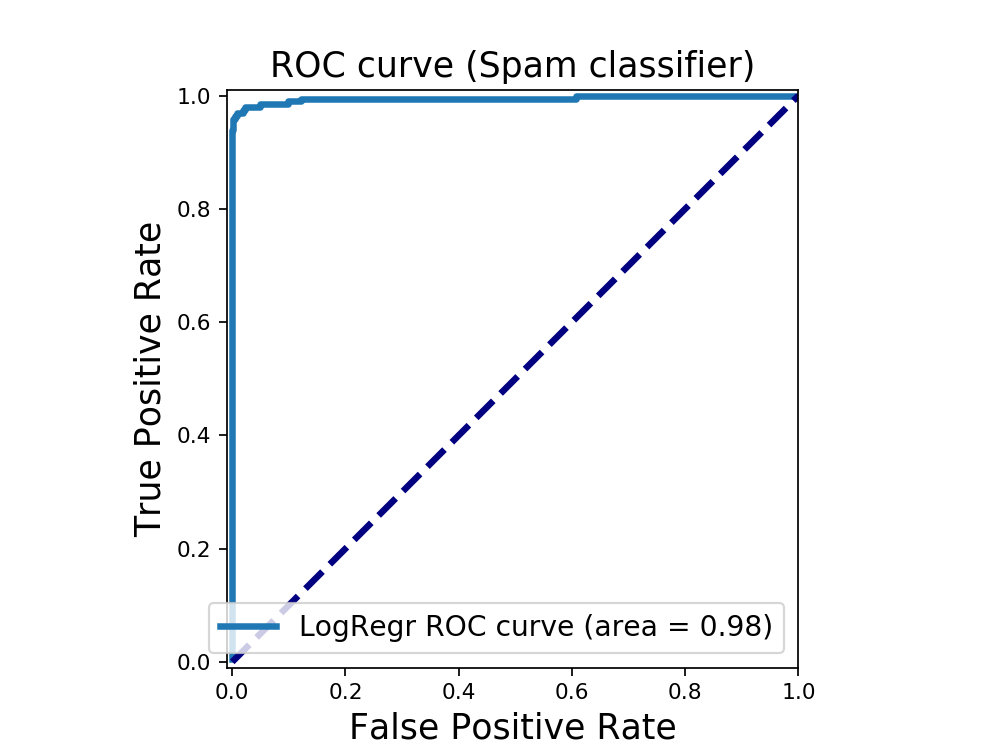

C:\Users\redex\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [525]:
%matplotlib notebook
import seaborn as sns
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_score_lr = clfrLR.decision_function(X_test_vectorized_adds)
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_score_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_LR, tpr_LR, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Spam classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [526]:
def answer_eleven():
    X_train_chars = X_train.str.len()
    X_train_digits = X_train.str.count(r'\d')
    X_train_nonword_chars = X_train.str.count(r'\W')
    X_test_chars = X_test.str.len()
    X_test_digits = X_test.str.count(r'\d')
    X_test_nonword_chars = X_test.str.count(r'\W')

    vect = CountVectorizer(min_df=5, ngram_range=(2,5), analyzer='char_wb').fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    X_test_vectorized = vect.transform(X_test)

    X_train_vectorized_adds = add_feature(X_train_vectorized, [X_train_chars, X_train_digits, X_train_nonword_chars])
    X_test_vectorized_adds = add_feature(X_test_vectorized, [X_test_chars, X_test_digits, X_test_nonword_chars])

    clfrLR = LR(C=100)
    clfrLR.fit(X_train_vectorized_adds, y_train)

    predictions = clfrLR.predict(X_test_vectorized_adds)
    auc = roc_auc_score(y_test, predictions)

    feature_names = vect.get_feature_names()+['length_of_doc', 'digit_count', 'non_word_char_count']
    feature_coef = pd.Series(data=clfrLR.coef_[0], index=feature_names)
    largest_coef = feature_coef.nlargest(10)   
    smallest_coef =feature_coef.nsmallest(10)

    return auc, smallest_coef, largest_coef

In [527]:
answer_eleven()

(0.9788593110707434, .     -0.869759
 ..    -0.860868
 ?     -0.676975
  i    -0.667015
  y    -0.614893
  go   -0.579583
 :)    -0.535073
  h    -0.505772
 go    -0.498503
  m    -0.490956
 dtype: float64, digit_count    1.212217
 ne             0.597769
 ia             0.541480
 co             0.538770
 xt             0.521477
  ch            0.520344
 mob            0.517867
  x             0.516090
 ww             0.508670
 ar             0.502654
 dtype: float64)